<br>
<center>
<font size="+6"><b>Group 3 Project</b></font><br><br>
<font size="+3"><b>Music Imagery Information Retrieval</b></font><br>
</center>

<br><br>

- Students: *Elias Düker, Leon Grund, Jakob Prager, Veronika Pressler*
- Course: *Neuroinformatics: Machine Learning for Neuronal Data Analysis (2022W)*
- Deadline: *January 26, 2023*

<br>

**Todo's.**
- [x] Raw Data
- [ ] Preprocessing
- [ ] Save Data
- [ ] Methods (gridsearch)
- [ ] Experiments
- [ ] Results

<br>

**Abstract summary.**
...

<br>

**Table of contents.**
1. [Raw data](#data)
2. [Preprocessing](#preprocessing)
3. [Classifier](#classifier)
4. [Experiments](#experiments)
5. [Results](#results)

<br>

**Requirements.**
Please make sure that all 10 `fif` files<sup>1</sup> can be found in a folder `data` in the same directory as this notebook, i.e.
```
project/
│   readme.md
│   this_notebook.ipynb
│
└───data/
        P01-raw.fif
        P04-raw.fif
        ...
        P14-raw.fif
```

<sub><sup>1</sup>You can download the raw files here: http://bmi.ssc.uwo.ca/OpenMIIR-RawEEG_v1/.</sub>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline

# mne
import mne
from mne.preprocessing import ICA, read_ica
from mne.decoding import CSP, UnsupervisedSpatialFilter

# sklearn
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [2]:
print('python:', sys.version.split()[0])
print('numpy:', np.__version__)
print('matplotlib:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)
print('mne:', mne.__version__)
print('seaborn:', sns.__version__)

python: 3.8.3
numpy: 1.18.5
matplotlib: 3.2.2
sklearn: 0.23.1
mne: 1.2.3
seaborn: 0.10.1


<div class="alert alert-block alert-info">Question: Can we put everything together in one class or should we execute the code cell by cell?</div>

In [3]:
class MusicImageryInformationRetrieval:
    
    def __init__(self, data_folder='data/'):
        # initialize folder structure and import files
        self.data_folder = data_folder
        self.raw_file = [f for f in os.listdir(data_folder) if f.endswith('.fif')]
        assert len(self.raw_file) > 0, f'You need at least one fif-file in the folder "{data_folder}".'
        
    
    def preprocess_data(self):
        pass
    
    def load_data_and_labels(self):
        pass
    
    def train_func(self, X_train, y_train):
        pass
    
    def decision_func(self, clf, X_test):
        pass
    
    def run_pipeline(self, data_list, event_labels):
        pass
    
    def print_results(self):
        pass
    
    def confusion_matrix(self):
        pass
    
    def plot_raw_data(self):
        pass
    
    def plot_preprocessed_data(self):
        pass

In [4]:
x = MusicImageryInformationRetrieval()

x.raw_file

['P01-raw.fif',
 'P04-raw.fif',
 'P05-raw.fif',
 'P06-raw.fif',
 'P07-raw.fif',
 'P09-raw.fif',
 'P11-raw.fif',
 'P12-raw.fif',
 'P13-raw.fif',
 'P14-raw.fif']

<a id="data"></a>
# 1. Raw data

Below we show an example how to load and illustrate the raw EEG data for subject `P01`.

In [5]:
# subjects = ['P01','P04','P05','P06','P07','P09','P10','P11','P12','P13','P14']

raw = mne.io.read_raw_fif('data/P01-raw.fif', verbose=0)
raw.info

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 Stimulus
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>

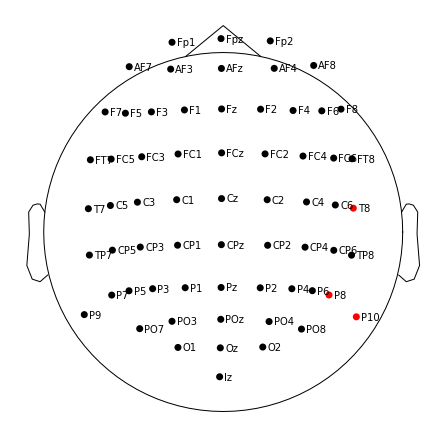

In [6]:
# set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# plot topomap of sensors
raw.plot_sensors(kind='topomap', show_names=True, to_sphere=True);

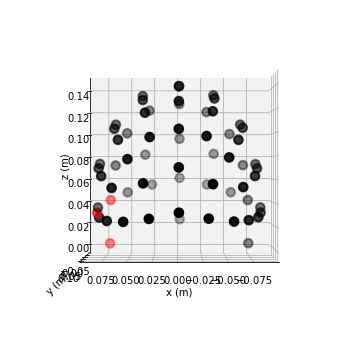

In [7]:
raw.plot_sensors(kind='3d');

Using matplotlib as 2D backend.


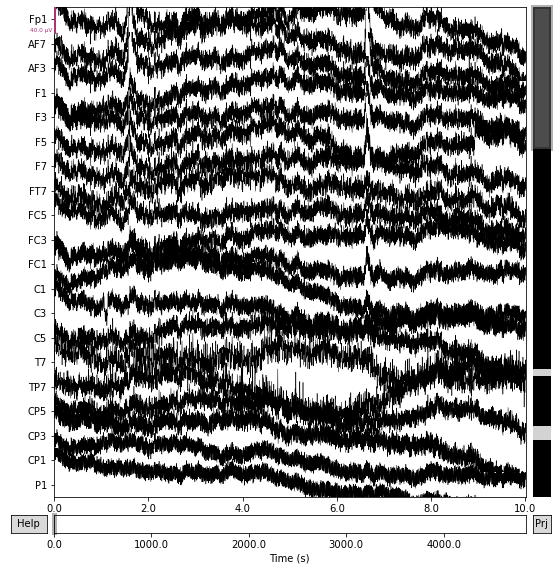

In [8]:
raw.plot();

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


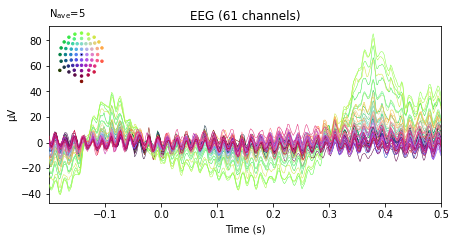

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


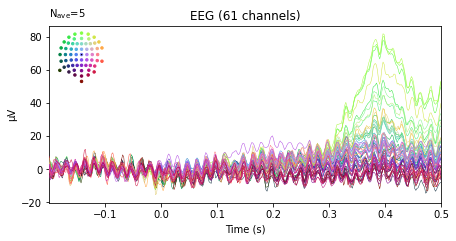

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


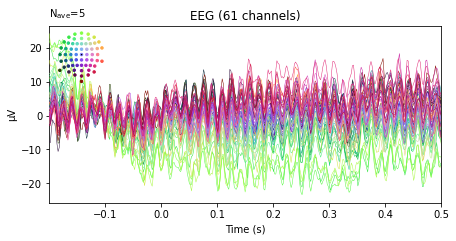

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


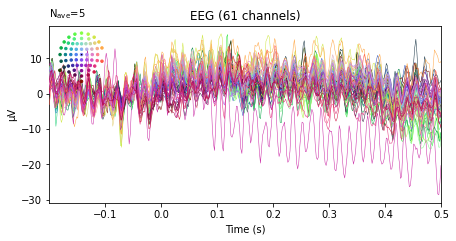

In [377]:
# for i, sub in enumerate(['P01','P04','P05','P06','P07','P09','P11','P12','P13','P14']):
#     raw = mne.io.read_raw_fif(f'data/{sub}-raw.fif', verbose=0)
#     events = mne.find_events(raw, stim_channel='STI 014', verbose=0)
#     for c in [1, 2, 3, 4]:
#         fig = mne.Epochs(raw, events=events, verbose=0)[f'1{c}'].average().plot();
#         fig.savefig(f'figures/{sub}_1{c}.png')

events = mne.find_events(raw, stim_channel='STI 014', verbose=0)
for c in [1, 2, 3, 4]:
    mne.Epochs(raw, events=events, verbose=0)[f'1{c}'].average().plot();

<ipython-input-368-09dace75f4b1>:4: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)


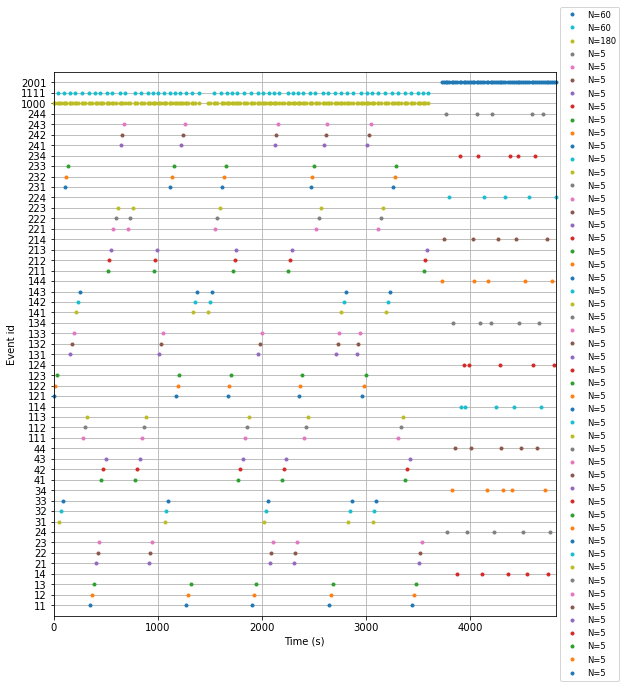

In [368]:
plt.figure(figsize=(10, 10))
axes = plt.gca()
trial_events = mne.find_events(raw, stim_channel='STI 014', shortest_event=0, verbose=0)
fig = mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)

<a id="preprocessing"></a>
# 2. Preprocessing

The function `preprocess_raw_data` takes care of all preprocessing steps such as band-pass filtering, ICA with EOG detection, and averaging. <font color="red">Are there any further steps possible? For example, PCA worked quite well in our programming assignment, right?</font>

For reproducibility, we decided to always use the middle (i.e. third) event as the test set.

In [9]:
def preprocess_raw_data_single_subject(subject='P01', event_encodings=None):
    
    # preload data
    data = mne.io.read_raw_fif(f'data/{subject}-raw.fif', preload=True, verbose=0)
    
    # remove ambiguous channels (e.g. 'EXG5', 'EXG6', ...)
    ch_names = data.info['ch_names']
    ch_types = data.get_channel_types()
    drop_channels = []
    for name, typ in zip(ch_names, ch_types):
        if name.startswith('EXG') and typ == 'eeg':
            drop_channels.append(name)
    data.drop_channels(ch_names=drop_channels)
    
    # set montage
    montage = mne.channels.make_standard_montage('standard_1020')
    data.set_montage(montage, on_missing='ignore', verbose=0)
    
    # interpolate bad channels
    data.interpolate_bads(reset_bads=True, verbose=0)
    
    # apply bandpass-filtering between 1 and 40 Hz
    data.filter(l_freq=1., h_freq=40., verbose=0)
    
    # downsampling to 64 Hz
    data.resample(64., npad='auto', verbose=0)
    
#     # independent component analysis (n=15)
#     ica = ICA(n_components=15, max_iter='auto', verbose=0)
#     ica.fit(data, verbose=0)
#     eog_indices, eog_scores = ica.find_bads_eog(data, verbose=0)
#     ica.exclude = eog_indices
#     ica.apply(data, verbose=0)
    
    # averaging
    data.set_eeg_reference(ref_channels='average', verbose=0)
    
    # chunk data by events
    events = mne.find_events(data, shortest_event=1, stim_channel='STI 014', verbose=0)
    event_ids = list(event_encodings.keys()) if event_encodings else None
    epochs = mne.Epochs(data, events=events, event_id=event_ids, picks='eeg', tmin=-0.1, tmax=7., verbose=0)
    
    # get data and events
    x = epochs.get_data()
    y = np.vectorize(event_encodings.get)(epochs.events[:, 2])
    return x, y


def preprocess_raw_data(subject=None, event_encodings=None):
    if type(subject) == str:
        return preprocess_raw_data_single_subject(subject=subject, event_encodings=event_encodings)
    else:
        if not subject:
            subject = ['P01','P04','P05','P06','P07','P09','P11','P12','P13','P14']
        xs, ys = [], []
        for sub in subject:
            _x, _y = preprocess_raw_data_single_subject(subject=sub, event_encodings=event_encodings)
            xs.append(_x)
            ys.append(_y)
        return np.concatenate(xs), np.concatenate(ys)

<a id="methods"></a>
# 3. Methods

The implementation is similar to our programming assignment with functions `train_func`, `decision_func`. In addition, I've collected the steps to produce the labelled dataset for different event_id mappings in the function `get_labelled_dataset`. Finally, the `run_pipeline` function applies `CSP`, `StandardScaler` and `LDA` classifier.

<font color="red">We should try different classifiers as I didn't get very good results with `LDA` so far...</font>

If time permits, we could try to use `CNN` or `RNN` models, which worked quite well on similar tasks, see [Silent EEG-Speech Recognition Using Convolutional and Recurrent Neural Network with 85% Accuracy of 9 Words Classification](https://pubmed.ncbi.nlm.nih.gov/34695956/).

In [10]:
def train_func(X_train, y_train):
    clf = Pipeline(steps=[
        ("PCA", UnsupervisedSpatialFilter(PCA(10), average=False)),
        ("CSP", CSP(n_components=10, reg='ledoit_wolf', log=True)),
        ("scaler", StandardScaler()),
        ("classify", SVC())]) 
    clf.fit(X_train, y_train)
    return clf

In [11]:
def decision_func(trained_clf, X_test):
    y_pred = trained_clf.predict(X_test)
    return y_pred

In [12]:
def run_pipeline(subject, event_labels):
    X_all, y_all = preprocess_raw_data(subject=subject, event_encodings=event_labels)
    
    split_obj = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

    acc = []

    for train_index, test_index in split_obj.split(X_all, y_all):
        # get train-test split
        X_train, X_test = X_all[train_index], X_all[test_index]
        y_train, y_test = y_all[train_index], y_all[test_index]

        # train classifier
        trained_clf = train_func(X_train, y_train)

        # predict labels
        y_pred = decision_func(trained_clf, X_test)

        # append accuracy for this fold
        acc.append(accuracy_score(y_test, y_pred))
    
    return acc

<a id="experiments"></a>
# 4. Experiments

The event markers recorded in the raw EEG comprise:
- Trial labels (as a concatenation of stimulus ID and condition) at the beginning of each trial
- Exact audio onsets for the first cue click of each trial in conditions 1 and 2 (detected by the Stimtracker)
- Subject feedback for the condition 4 trials (separate event IDs for positive and negative feedback)


For example, the event "imagining Chim Chim Cheree with lyrics and cue clicks" would be 12, since
- songs with lyrics belong the the `0`th group
- Chim Chim Cheree is the `1`st song in the group
- imagining with cue clicks is condition `2`

$\Rightarrow$ `012` = 12.

In [13]:
GROUPS = [0, 1, 2]
SONGS = [1, 2, 3, 4]
CONDS = [1, 2, 3, 4]

experiments = {}

In [14]:
# perception vs imagination with cue (balanced)
class0 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [1]]
class1 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [2]]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'perception vs imagination with cue': mapping})

In [15]:
# perception vs imagination without cue (balanced)
perception = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [1]]
imagination = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [3]]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'perception vs imagination without cue': mapping})

In [16]:
# perception vs imagination with feedback (balanced)
class0 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [1]]
class1 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [4]]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'perception vs imagination with feedback': mapping})

In [17]:
# imagination with cue vs imagination without cue (balanced)
class0 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [2]]
class1 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [3]]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'imagination with cue vs imagination without cue': mapping})

In [18]:
# imagination with cue vs imagination with feedback (balanced)
class0 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [2]]
class1 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [4]]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'imagination with cue vs imagination with feedback': mapping})

In [19]:
# imagination without cue vs imagination with feedback (balanced)
class0 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [3]]
class1 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [4]]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'imagination without cue vs imagination with feedback': mapping})

In [20]:
# lyrics vs non-lyrics (balanced)
class0 = [int(f'{g}{s}{c}') for g in [0] for s in SONGS for c in CONDS]
class1 = [int(f'{g}{s}{c}') for g in [1] for s in SONGS for c in CONDS]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'lyrics vs non-lyrics': mapping})

In [21]:
# lyrics vs non-lyrics vs instrumental
class0 = [int(f'{g}{s}{c}') for g in [0] for s in SONGS for c in CONDS]
class1 = [int(f'{g}{s}{c}') for g in [1] for s in SONGS for c in CONDS]
class2 = [int(f'{g}{s}{c}') for g in [2] for s in SONGS for c in CONDS]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})
mapping.update({event_id: 1 for event_id in class2})

experiments.update({'lyrics vs non-lyrics vs instrumental': mapping})

In [22]:
# lyrics vs instrumental
class0 = [int(f'{g}{s}{c}') for g in [0] for s in SONGS for c in CONDS]
class1 = [int(f'{g}{s}{c}') for g in [2] for s in SONGS for c in CONDS]

mapping = {}
mapping.update({event_id: 0 for event_id in class0})
mapping.update({event_id: 1 for event_id in class1})

experiments.update({'lyrics vs instrumental': mapping})

<a id="Results"></a>
# 5. Results

In [25]:
results = {title: run_pipeline('P01', mapping) 
           for title, mapping in experiments.items()}

In [477]:
# only for participant 1
for title, acc in results.items():
    print('#####', title, '#####')
    print('Mean', np.mean(acc), '+/-', np.std(acc))
    print()

##### perception vs imagination with cue #####
Mean 0.5833333333333334 +/- 0.14433756729740643

##### perception vs imagination without cue #####
Mean 0.5833333333333334 +/- 0.14433756729740643

##### perception vs imagination with feedback #####
Mean 0.9 +/- 0.033333333333333305

##### imagination with cue vs imagination without cue #####
Mean 0.7 +/- 0.17950549357115014

##### imagination with cue vs imagination with feedback #####
Mean 0.8666666666666666 +/- 0.07637626158259732

##### imagination without cue vs imagination with feedback #####
Mean 0.7333333333333334 +/- 0.15275252316519466

##### lyrics vs non-lyrics #####
Mean 0.51875 +/- 0.1701332198602025

##### lyrics vs non-lyrics vs instrumental #####
Mean 0.6624999999999999 +/- 0.05086064839889042

##### lyrics vs instrumental #####
Mean 0.49375 +/- 0.07098635432250341



In [26]:
results = {title: run_pipeline(subject=None, event_labels=mapping) 
           for title, mapping in experiments.items()
           if 'perception' in title}

In [24]:
# using data from all 10 participants
for title, acc in results.items():
    print('#####', title, '#####')
    print('Mean', np.mean(acc), '+/-', np.std(acc))
    print()

##### perception vs imagination with cue #####
Mean 0.5883333333333333 +/- 0.060804787823182334

##### perception vs imagination without cue #####
Mean 0.5875 +/- 0.059889945362769835

##### perception vs imagination with feedback #####
Mean 0.6833333333333333 +/- 0.018257418583505533

